In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.

# 4번

In [2]:
data4 = pd.read_excel('./MSFT.xlsx')

In [3]:
data4.head()

,일자,시간,종가
0,2020/11/17,15:57:00,214.66
1,2020/11/17,15:57:00,214.65
2,2020/11/17,15:57:00,214.66
3,2020/11/17,15:57:00,214.67
4,2020/11/17,15:57:00,214.65


In [4]:
data4.dtypes

일자     object
시간     object
종가    float64
dtype: object

In [5]:
data4.columns = ['date', 'time', 'close']

In [6]:
data4 = data4[data4['date'] == '2020/11/18']
data4.reset_index(drop = True, inplace = True)

In [7]:
data4['close'] = np.log(data4['close'])

In [43]:
data4

,date,time,close
0,2020/11/18,06:00:00,5.368869
1,2020/11/18,06:00:00,5.368869
2,2020/11/18,06:00:00,5.366256
3,2020/11/18,06:00:00,5.366210
4,2020/11/18,06:00:00,5.366210
...,...,...,...
62415,2020/11/18,15:57:00,5.353511
62416,2020/11/18,15:57:00,5.353516
62417,2020/11/18,15:57:00,5.353492
62418,2020/11/18,15:57:00,5.353468


In [8]:
data_diff = data4['close'].diff(1).dropna()
data_diff
data_diff_square = data_diff * data_diff
data_diff.reset_index(drop = True, inplace = True)

1        0.000000
2       -0.002613
3       -0.000047
4        0.000000
5        0.000000
           ...   
62415    0.000043
62416    0.000005
62417   -0.000024
62418   -0.000024
62419    0.000047
Name: close, Length: 62419, dtype: float64

Text(0.5, 1.0, 'Realized Volatility')

Text(0.5, 0, 'Frequency(1/m)')

Text(0, 0.5, 'RV')

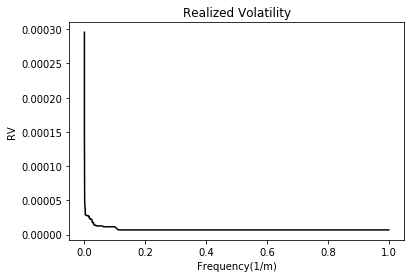

In [9]:
data_diff_square_cumsum = data_diff_square.cumsum()
plt.plot(1/data_diff.index, data_diff_square_cumsum, color = 'black')
plt.title('Realized Volatility')
plt.xlabel('Frequency(1/m)')
plt.ylabel('RV')
plt.show()

위와 같은 그래프가 나옴.

In [17]:
data_diff
data_diff_square
data_diff_square_cumsum

0        0.000000
1       -0.002613
2       -0.000047
3        0.000000
4        0.000000
           ...   
62414    0.000043
62415    0.000005
62416   -0.000024
62417   -0.000024
62418    0.000047
Name: close, Length: 62419, dtype: float64

1        0.000000e+00
2        6.826060e-06
3        2.182475e-09
4        0.000000e+00
5        0.000000e+00
             ...     
62415    1.813440e-09
62416    2.238709e-11
62417    5.596877e-10
62418    5.597142e-10
62419    2.238804e-09
Name: close, Length: 62419, dtype: float64

1        0.000000
2        0.000007
3        0.000007
4        0.000007
5        0.000007
           ...   
62415    0.000296
62416    0.000296
62417    0.000296
62418    0.000296
62419    0.000296
Name: close, Length: 62419, dtype: float64

# 5번

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Realized Volatility of simple difference')

[None, None, -5e-05, 0.001]

Text(0.5, 0, 'Log Frequency')

Text(0, 0.5, 'RV')

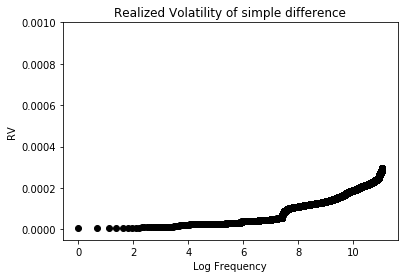

In [10]:
plt.scatter(np.log(data_diff.index), data_diff_square_cumsum, color = 'black')
plt.title('Realized Volatility of simple difference')
plt.axis([None, None, -0.00005, 0.001])
plt.xlabel('Log Frequency')
plt.ylabel('RV')
plt.show()

## PRV

웬만해선 건드리지 말자. 시간이 너무 오래 걸린다...

In [11]:
kshi = 1/12

In [12]:
def gx(x):
    return min(x, 1-x)

In [13]:
def yBar(K, r):
    res = 0
    for l in range(K):
        res = res + gx(l/K) * data_diff[r+l]
    return res

In [14]:
def zeta(K):
    res = 0
    for l in range(K):
        res = res + (gx(l/K) - gx((l+1)/K))**2
    return res

In [15]:
def eta(n):
    return 1/(2*n) * data_diff_square_cumsum[n]

K = 10으로 진행. 연산속도를 고려해서 n은 log(200)의 frequency 간격을 갖고 진행

### 주의!! 시간이 오래 걸림. 건드리지 않는 것을 추천!

In [73]:
K = 50
n = len(data_diff)
PRV_idx = []
PRV_res = []
for _n in range(K+1, n, 200):
    _sum = 0
    print(_n)
    for i in range(_n-K+1):
        _sum = _sum + ((yBar(K,i)**2) - zeta(K) * eta(_n))
    RV_PRV = 1/(kshi*K) * _sum
    PRV_idx.append(_n)
    PRV_res.append(RV_PRV)
    


51
251
451
651
851
1051
1251
1451
1651
1851
2051
2251
2451
2651
2851
3051
3251
3451
3651
3851
4051
4251
4451
4651
4851
5051
5251
5451
5651
5851
6051
6251
6451
6651
6851
7051
7251
7451
7651
7851
8051
8251
8451
8651
8851
9051
9251
9451
9651
9851
10051
10251
10451
10651
10851
11051
11251
11451
11651
11851
12051
12251
12451
12651
12851
13051
13251
13451
13651
13851
14051
14251
14451
14651
14851
15051
15251
15451
15651
15851
16051
16251
16451
16651
16851
17051
17251
17451
17651
17851
18051
18251
18451
18651
18851
19051
19251
19451
19651
19851
20051
20251
20451
20651
20851
21051
21251
21451
21651
21851
22051
22251
22451
22651
22851
23051
23251
23451
23651
23851
24051
24251
24451
24651
24851
25051
25251
25451
25651
25851
26051
26251
26451
26651
26851
27051
27251
27451
27651
27851
28051
28251
28451
28651
28851
29051
29251
29451
29651
29851
30051
30251
30451
30651
30851
31051
31251
31451
31651
31851
32051
32251
32451
32651
32851
33051
33251
33451
33651
33851
34051
34251
34451
34651
34851
35051


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Realized Volatility')

[None, None, -5e-05, 0.001]

Text(0.5, 0, 'Log Frequency')

Text(0, 0.5, 'RV')

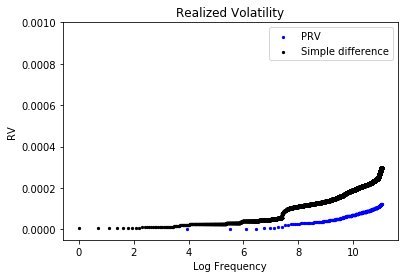

In [74]:
plt.scatter(np.log(np.array(PRV_idx)), PRV_res, color = 'blue', label = 'PRV', s = 5)
plt.scatter(np.log(data_diff.index), data_diff_square_cumsum, color = 'black', label = 'Simple difference', s = 5)
plt.title('Realized Volatility')
plt.axis([None, None, -0.00005, 0.001])
plt.legend(loc = 'best')
plt.xlabel('Log Frequency')
plt.ylabel('RV')
plt.show()

## MSRV

In [75]:
def tow_K(K):
    _sum = 0
    for i in range(n-K):
        _sum = _sum + (data4['close'].iloc[K+i]-data4['close'].iloc[i])**2
    return 1/K * _sum

In [76]:
def ak(k):
    return (12 * (k+N) * (k-M/2-1/2))/(M * (M*M-1))

### 주의!! 함부로 실행하지 마시오!! 오래걸립니다!!!

In [ ]:
# MSRV process
c1 = 1
c2 = 2
# ex1
MSRV_idx = np.array(list(range(500, len(data4), 1000)))
MSRV_list = []
for n in MSRV_idx:
    print(n)
    N = int(np.round(c1*np.sqrt(n), 0))
    M = int(np.round(c2*np.sqrt(n), 0))
    zeta2 = ((M+N)*(N+1))/((n+1)*(M-1))
    temp_back = (tow_K(N+1) - tow_K(N+M))
    _sum = 0
    for k in range(M):
        _sum = _sum + ak(k) * tow_K(N+k)
    res = _sum + zeta2 * temp_back
    MSRV_list.append(res)

500
1500
2500
3500
4500
5500
6500
7500
8500
9500
10500
11500
12500
13500
14500
15500
16500
17500
18500
19500
20500
21500
22500
23500
24500
25500
26500
27500
28500
29500
30500
31500
32500
33500
34500
35500
36500
37500
38500
39500
40500
41500
42500
43500
44500
45500
46500
47500
48500
49500
50500
51500
52500
53500
54500
55500
56500
57500
58500
59500
60500
61500


In [ ]:
#plt.scatter(np.log(np.array(PRV_idx)), PRV_res, color = 'blue', label = 'PRV', s = 5)
plt.scatter(np.log(data_diff.index), data_diff_square_cumsum, color = 'black', label = 'Simple difference', s = 5)
plt.scatter(np.log(MSRV_idx), MSRV_list, color = 'red', label = 'MSRV', s = 10)
plt.title('Realized Volatility')
plt.axis([None, None, -0.00005, 0.001])
plt.legend(loc = 'best')
plt.xlabel('Log Frequency')
plt.ylabel('RV')
plt.show()